## Get the data ready

In [1]:
%load_ext autoreload
%autoreload 2

# imports
from datetime import datetime, timedelta

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle

from helpers.stationarity import remove_trend_and_diff

In [2]:
## Load in the data ##
# This data corresponds with one of the experiments carried out in this paper : 
# https://arxiv.org/pdf/2104.08043v1.pdf
# More specifically, this data is the first of the 200 data samples used in 
# the Causal Sufficiency experiment, with one latent variable.
# See https://github.com/causalens/cdml-neurips2020 for more information.

filename = 'data.pickle'

with open(filename, 'rb') as f:
    # the pickle file contains a pandas dataframe as well as the causal
    # graph that was generated by the authors of the paper, which we don't need
    df, _ = pickle.load(f)

In [3]:
# Process data
df.index = pd.date_range(datetime.today() - timedelta(days = len(df)), 
                         periods=len(df))
df_stat = remove_trend_and_diff(df.resample('W-MON').mean(), 
                                debug=False)
df.head()

tackling new col X1
 --> (KPSS & ADF) Time-series IS stationary for X1 (after 0 differencing operations)!

tackling new col X10
 --> (KPSS & ADF) Time-series IS stationary for X10 (after 0 differencing operations)!

tackling new col X2
 --> (KPSS & ADF) Time-series IS stationary for X2 (after 0 differencing operations)!

tackling new col X3
 --> (KPSS & ADF) Time-series IS stationary for X3 (after 0 differencing operations)!

tackling new col X4
 --> (KPSS & ADF) Time-series IS stationary for X4 (after 0 differencing operations)!

tackling new col X5
 --> (KPSS & ADF) Time-series IS stationary for X5 (after 0 differencing operations)!

tackling new col X6
 --> (KPSS & ADF) Time-series IS stationary for X6 (after 0 differencing operations)!

tackling new col X7
 --> (KPSS & ADF) Time-series IS stationary for X7 (after 0 differencing operations)!

tackling new col X8
 --> (KPSS & ADF) Time-series IS stationary for X8 (after 0 differencing operations)!

tackling new col X9
 --> (KPSS & AD

,X1,X10,X2,X3,X4,X5,X6,X7,X8,X9
2019-09-06 23:45:32.296715,-1.667105,-0.647129,0.580980,-0.943676,0.475631,-0.298541,-0.562768,0.511342,1.176538,-0.137143
2019-09-07 23:45:32.296715,0.224083,0.508340,0.521288,0.405035,0.918387,-0.611866,2.306102,-0.658871,0.179594,-0.455267
2019-09-08 23:45:32.296715,-1.086641,0.201047,-2.989957,0.466461,-0.292212,-0.960543,0.697460,-0.682488,0.692319,1.161958
2019-09-09 23:45:32.296715,-0.421986,0.993365,0.662050,-0.896384,-0.430599,1.764546,0.370239,2.418368,0.616185,-0.104601
2019-09-10 23:45:32.296715,-0.109283,-0.413054,-1.222458,1.193096,-0.220662,-0.831529,0.723627,-0.544237,0.502862,-1.117350


### Cool! Apparently, our dataset was completely stationary already. Let's start the analysis

In [4]:
# determine min and max lags
tau_min=0
tau_max=4

# 1. Transfer entropy

## Run TE

In [5]:
# imports
from transfer_entropy.transfer_entropy_wrapper import average_transfer_entropy
from helpers.transfer_entropy import export_as_df

In [6]:
# Number of shuffles to perform to determine the results' significance.
n_shuffles = 50 
# Whether or not to calculate the effective Transfer Entropy.
effective = False
# Whether or not to show intermediate results.
debug = False

# Function execution
# !Make sure the first column in your dataframe is the target column you want to find causality for!
# In our case, we want to check causality with respect to X10, which we then define as the target var
def bring_col_to_front(df, column):
    return df[[column] + [col for col in df.columns if col != column]]
df_stat = bring_col_to_front(df_stat, "X10")

avg_nonlin_te = average_transfer_entropy(df_stat, 
                                         linear=False, 
                                         effective=effective, 
                                         tau_min=tau_min, 
                                         tau_max=tau_max,
                                         n_shuffles=n_shuffles, 
                                         debug=debug)
avg_nonlin_te_arr = np.array(avg_nonlin_te)


lag(0)
X1 -> X10
X2 -> X10
X3 -> X10
X4 -> X10
X5 -> X10
X6 -> X10
X7 -> X10
X8 -> X10
X9 -> X10
took 15.5995512008667 seconds

lag(1)
X1 -> X10
X2 -> X10
X3 -> X10
X4 -> X10
X5 -> X10
X6 -> X10
X7 -> X10
X8 -> X10
X9 -> X10
took 14.241465091705322 seconds

lag(2)
X1 -> X10
X2 -> X10
X3 -> X10
X4 -> X10
X5 -> X10
X6 -> X10
X7 -> X10
X8 -> X10
X9 -> X10
took 13.998454570770264 seconds

lag(3)
X1 -> X10
X2 -> X10
X3 -> X10
X4 -> X10
X5 -> X10
X6 -> X10
X7 -> X10
X8 -> X10
X9 -> X10
took 13.934021949768066 seconds

lag(4)
X1 -> X10
X2 -> X10
X3 -> X10
X4 -> X10
X5 -> X10
X6 -> X10
X7 -> X10
X8 -> X10
X9 -> X10
took 13.63166069984436 seconds


In [7]:
# Parse output as pandas dataframe
avg_nonlin_te_df = export_as_df(avg_nonlin_te_arr)

In [8]:
# Remember that the parsed output of TE contains p-values
# To draw conclusions from these statistical notions, we have to 
# arbitrarily pick an alpha (cut-off) value. Based on that value, we 
# determine for which links there seems enough statistical evidence to conclude causality
threshold = 0.01
booldf = avg_nonlin_te_df.iloc[:,:]<threshold

## Visualize results TE

In [9]:
from helpers.transfer_entropy import viz_df_raw

X1
X2
X3
X4
X5
X6
X7
X8
X9


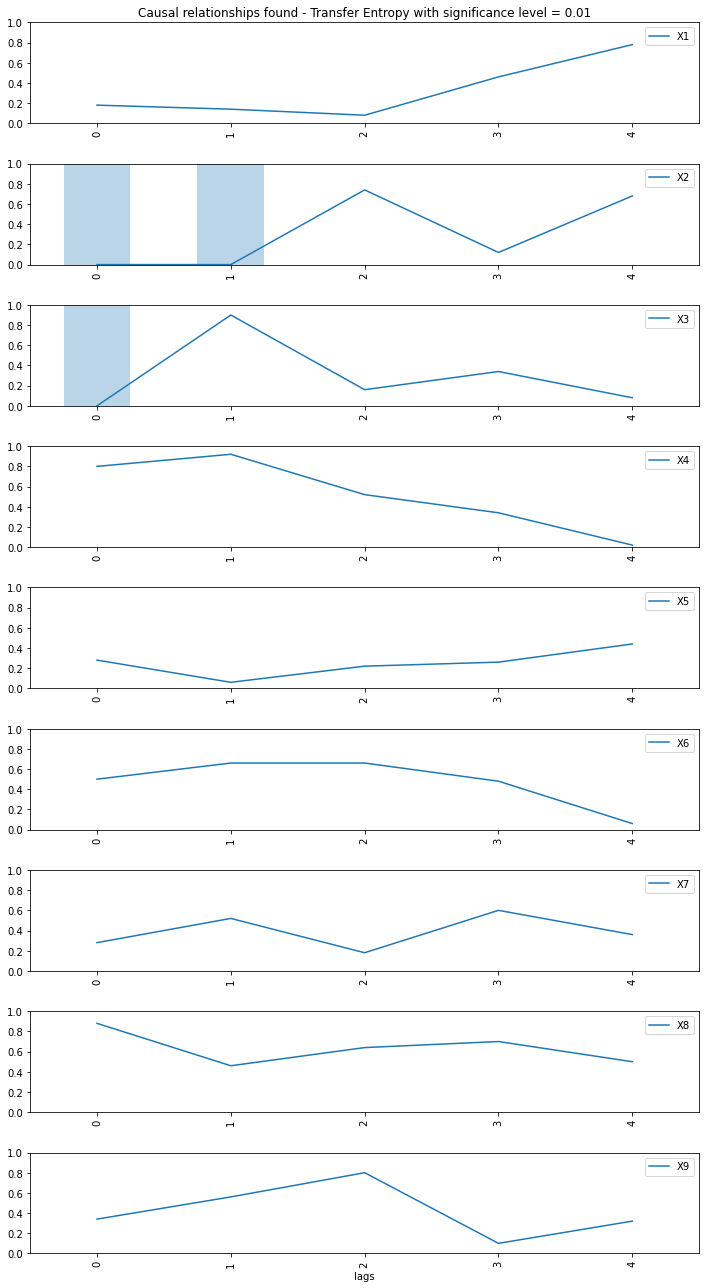

In [10]:
viz_df_raw(avg_nonlin_te_df, booldf, threshold)

#### Graph explanations
The lineplots show the actual p-values for a given link between the target Variable (X10) and the explanatory variable at a given lag. Based on the cut-off value that we chose, we then also plot blue bars. These blue bars are popping up for the p values that are below the theshold. In essence these denote the combination of lags and variables that show a causal link for with regard to the target variable (X10 in this case).

In [11]:
# clear matplotlib buffer to be able to make figures for pcmci
plt.clf()

<Figure size 432x288 with 0 Axes>

# 2. PCMCI

In [12]:
# imports
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import CMIknn

from helpers.pcmci import get_selected_links, process_and_visualize_results

In [13]:
# convert to pp dataframe
dataframe = pp.DataFrame(df_stat.to_numpy(),
                         datatime = np.arange(len(df_stat)), 
                         var_names=df_stat.columns)

# CMIknn as independence test
cmi_knn = CMIknn(significance='shuffle_test', shuffle_neighbors=5, transform='ranks')

# Configure the links that you want to causal-check with PCMCI
target_column_indices = [0,1]
selected_links = get_selected_links(df_stat, 
                                     tau_min=tau_min, 
                                     tau_max=tau_max, 
                                     selected_columns_indices=target_column_indices)

# Instantiate PCMCI
pcmci_cmi_knn = PCMCI(
        dataframe=dataframe, 
        cond_ind_test=cmi_knn,
        verbosity=2)

# Run PCMCI algorithm with a given alpha
# in this example, the value is taken very high (not really conservative) to be sure we have results.
# Remember that we are working with a toy dataset! IRL, the alpha value should be lower ([0.05-0.4]).
# Note that running this function takes a lot of compute and therefor time!
alpha = 0.25
results = pcmci_cmi_knn.run_pcmci(selected_links=selected_links, 
                                  tau_min=tau_min, 
                                  tau_max=tau_max, 
                                  pc_alpha=alpha)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
selected_links = {0: [(1, -1), (1, -2), (1, -3), (1, -4), (2, -1), (2, -2), (2, -3), (2, -4), (3, -1), (3, -2), (3, -3), (3, -4), (4, -1), (4, -2), (4, -3), (4, -4), (5, -1), (5, -2), (5, -3), (5, -4), (6, -1), (6, -2), (6, -3), (6, -4), (7, -1), (7, -2), (7, -3), (7, -4), (8, -1), (8, -2), (8, -3), (8, -4), (9, -1), (9, -2), (9, -3), (9, -4)], 1: [(1, -1), (1, -2), (1, -3), (1, -4), (2, -1), (2, -2), (2, -3), (2, -4), (3, -1), (3, -2), (3, -3), (3, -4), (4, -1), (4, -2), (4, -3), (4, -4), (5, -1), (5, -2), (5, -3), (5, -4), (6, -1), (6, -2), (6, -3), (6, -4), (7, -1), (7, -2), (7, -3), (7, -4), (8, -1), (8, -2), (8, -3), (8, -4), (9, -1), (9, -2), (9, -3), (9, -4)], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
independence test = cmi_knn
tau_min = 1
tau_max = 4
pc_alpha = [0.25]
max_conds_dim = None
max_combinations = 1



## Variable X10

Iterating through pc_alpha = [0.25]:

# pc_alpha = 0.25 (1/1):

Test

## Visualize results PCMCI


## Significant links at alpha = 0.01:

    Variable X10 has 1 link(s):
        (X2 -1): pval = 0.00900 | val =  0.039

    Variable X1 has 2 link(s):
        (X3 -3): pval = 0.00100 | val =  0.050
        (X1 -2): pval = 0.00900 | val =  0.039

    Variable X2 has 0 link(s):

    Variable X3 has 0 link(s):

    Variable X4 has 0 link(s):

    Variable X5 has 0 link(s):

    Variable X6 has 0 link(s):

    Variable X7 has 0 link(s):

    Variable X8 has 0 link(s):

    Variable X9 has 0 link(s):
X10
X1
X2
X3
X4
X5
X9


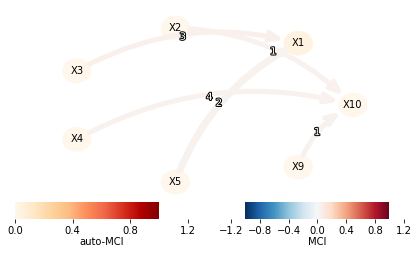

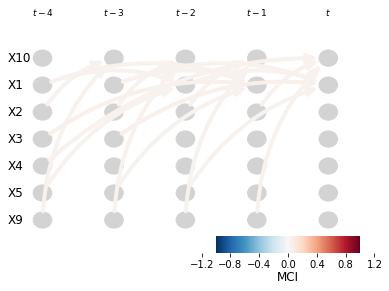

In [14]:
process_and_visualize_results(results, pcmci_cmi_knn, df_stat.columns, target_column_indices)

Have a look for yourself! Do the results for TE and PCMCI match? 
- No? Well, then you've probably not found very strong evidence for the presence of the causal links!
- Yes? This is an indication that the results are consistent and make a lot of sense!

Please note that this is a toy dataset, of which the causal links are unknown and very weak

Make sure to look deeper into the hyperparameters of PCMCI and TE to have them suit your data better. Good luck and have fun :)